## Naive Bayes uygulaması
### Multinomial Bayes

In [38]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
digits = load_digits()

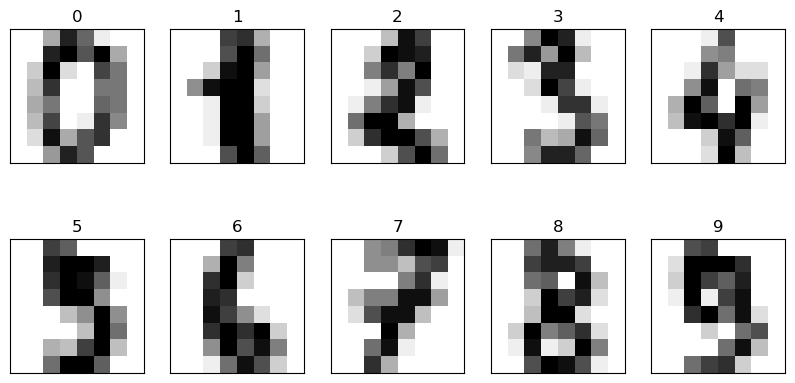

In [24]:
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (10,5), subplot_kw = {"xticks": [],"yticks": []})

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap="binary", interpolation = "nearest")
    ax.set_title(digits.target[i])

plt.show()

#axes.flat: axes matrisini düz bir liste gibi ele alır. Böylece subplot'lara tek tek erişim sağlar.
#digits.images[i]: digits veri kümesindeki i'inci görüntü.
#cmap="binary": Görüntüye siyah-beyaz renk haritası uygular.


In [26]:
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.87      0.71      0.78        28
           2       0.86      0.94      0.90        33
           3       1.00      0.88      0.94        34
           4       0.94      1.00      0.97        46
           5       0.97      0.83      0.90        47
           6       0.97      0.97      0.97        35
           7       0.92      1.00      0.96        34
           8       0.82      0.93      0.88        30
           9       0.77      0.85      0.81        40

    accuracy                           0.91       360
   macro avg       0.91      0.91      0.91       360
weighted avg       0.92      0.91      0.91       360



In [36]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 20,  4,  0,  0,  0,  0,  0,  2,  2],
       [ 0,  1, 31,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  1, 30,  0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  1,  0,  0,  7],
       [ 0,  0,  0,  0,  1,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  3,  1, 34]])

In [50]:
class_names = digits.target_names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

<Figure size 800x600 with 0 Axes>

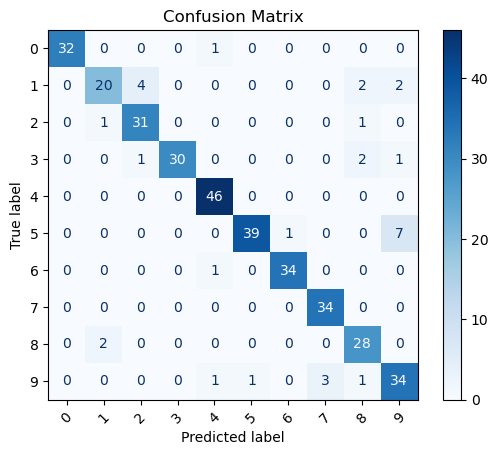

In [52]:
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.show()